<a href="https://colab.research.google.com/github/PatriciaSoaresSPereira/boaspratica/blob/main/previs%C3%A3o_de_cancer_de_mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Câncer de Mama

#1.Definicão do Problema:                  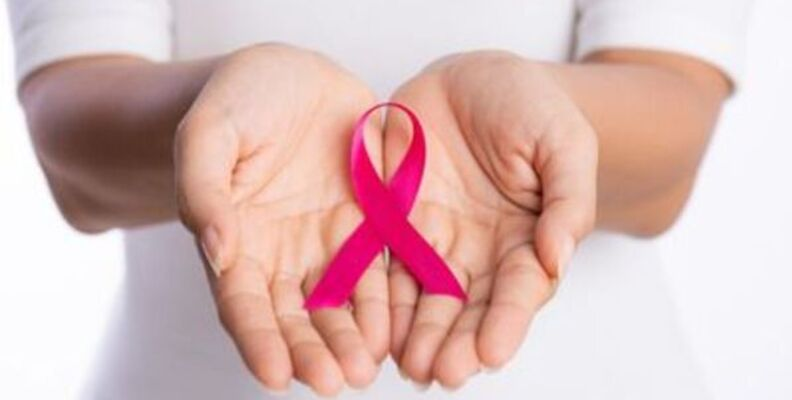

          

No ano de 2020, o câncer de mama tornou-se o tipo de câncer mais diagnosticado no mundo segundo a Organização Mundial da Saúde (OMS), ultrapasando o câncer de pulmão; com 2,3 milhões de novos casos mundialmente em 2020 (24,5% de novos casos de câncer em mulheres).

Em duas décadas, a quantidade de pessoas com o câncer quase duplicou: no ano de 2000 cerca de 10 milhões de pacientes tinham essa enfermidade, em 2020 já chegava na casa dos 19 milhões de pessoas. É estimado que hoje uma a cada cinco pessoas desenvolverá algum tipo de câncer ao longo da vida. Estudos sugerem que o número de pessoas dianosticadas com câncer aumentará nos próximos anos, sendo cerca de 50% maior em 2040 do que em 2020

O câncer de mama é o principal causador de óbito em mulheres com câncer. Em 2019, essa enfermidade causou 18.068 óbitos em mulheres, sendo responsável por 16,4% das mortes causadas por câncer. Além disso, em 2020, 66.280 novos casos foram estimados, representando 29,7% de todos os cânceres registrados em mulheres.

Mas quais são as causas e como pode ser tratato? A causa do câncer de mama não deve-se somente a um único fator, mas sim a soma deles, o primeiro fator é a idade; uma vez que quatro de cinco mulheres apresentam esse tipo de câncer com mais de 50 anos. Os outros são:

Fatores comportamentais:
- Sedentarismo;

- Obesidade e sobrepeso, principalmente depois da menopausa;

- Consumo de bebidas alcóolicas e;

- Exposição contante a raios X.


Fatores reprodutores e hormonais:
- Primeira menstruação antes dos 12 anos;

- Primeira gravidez depois dos 30 anos;

- Não ter tido filho;

- Menopausa após os 55 anos e;

- Ter feito reposição hormonal depois da menopausa por mais de 5 anos.


Fatores genéticos:
- Histórico familiar de câncer de ovário;

- Histórico familiar de câncer de mama, principalmente antes dos 50 anos;

- Caso de câncer de mama em homens da família e;

- Alterações genéticas nos genes BRCA1 e BRCA2.


Para ter uma prevenção do câncer de mama, além de ter um diagnóstico precoce, é realizar o autoexame mensalmente após os 20 anos de idade, cerca 4 a 6 dias após o fim do fluxo mensatrual. No caso das mulheres que não mensatruam, o aconselhavél é selecionar uma data para a realização de uma avaliação médica. Caso tenha algum desses sinais ou sintoma, fique alerta e procure assistência médica:

Nódulos palpáveis na mama ou na região das axilas;
Alterações na pele que recobre o local do nódulo;
Região da mama com aspecto parecido com uma casca de laranja e;
Saída de secreção.
Realizando o autoexame e a mamografia (especialmente para as mulheres com mais de 50 anos), a propabilidade de cura do câncer de mama em seu estágio inicial é de 95% .

Veja abaixo algumas das características morfológicas que o câncer de mama pode ter

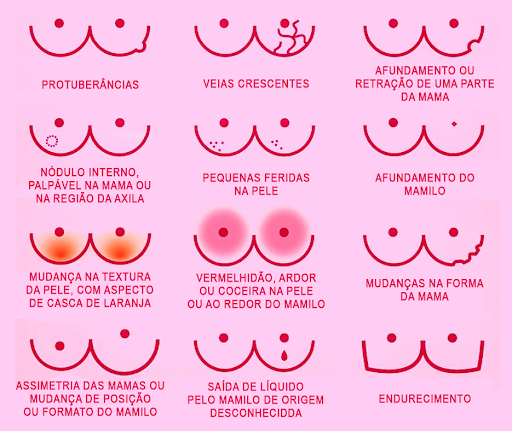




# Informações do Dataset

O banco de dados usado possui os seguintes dados:

ID: Número de identificação do paciente;

Diagnosis: Diagnóstico da neoplasia (M = maligno, B = benígno);

Radius: Média das distâncias do centro aos pontos no perímetro;

Texture: Desvio padrão dos valores em escala de cinza;

Perimeter: Perímetro da neoplasia;

Area: Área da neoplasia;

Smoothness: Variação local nos comprimentos dos raios;

Compactness: perimeter^2 / area - 1;

Concavity: Gravidade das porções côncavas do contorno;

Concave points: Número de porções côncavas do contorno;

Symmetry: Simetria da neoplasia e;

Fractal dimension: "paradoxo do litoral" - 1


Ao todo são 569 observações, sendo 357 classificadas como neoplasias benignas e 212 como malignas.



O dataset escolhido foi  https://www.kaggle.com/uciml/breast-cancer-wisconsin-data,

In [45]:
# configuração para não exibir os warnings
import warnings

# Importações de pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn import preprocessing
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# **2.Carga de Dados**

In [46]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/PatriciaSoaresSPereira/boaspratica/main/data.csv"

#Lê o arquivo utilizando  "latin1" por se tratar de base em de língua portuguesa
df = pd.read_csv(url, encoding="latin1")

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **3.Análise de Dados**

**3.1. Estatísticas Descritivas:**

 1.Quantos atributos e instancias existem?

 2.Quais são os tipos de dados dos atributos?

 3.Verifique as primeiras linhas do Dataset.Algo chama a atenção?

 4.Há valores faltantes , discrepantes ou inconsistentes?

 5.Resumo estatíco dos atributos com valo numerico(minímo, máximo, mediana, moda, média,desvio -padrão e número de valores ausentes) o Que você percebe?


In [47]:
# Mostra as dimensões do dataset
df.shape

(569, 33)

Como podemos ver, temos ao todo 33 colunas e 569 linhas (isto é: 569 observações/pacientes). A coluna dianosis contém a informação do diagnóstico da neoplasia, se é maligna (M) ou benigna (B). Mas o que a coluna id e Unnamed: 32 nos dizem? Analisando a disposição dos dados, ambas as colunas não interferem em nada na análise de nossos dados, podem até mesmo atrapalhar.

In [23]:
# Mostra as 10 primeiras linhas do dataset
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [24]:
# Mostra as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Não temos valor vazio (NaN) e os dados estão com os dtypes esperados. Agora vamos para a próxima seção

Como podemos notar, ambas as colunas foram excluídas. O próximo passo é ver se os dados estão dispostos conforme o tipo de dado. Por exemplo, se na coluna radius_mean os dados estiverem como object e não float64, devemos trocar o seu dtype para o correto, ou seja, de object para float64. Para ver se está tudo certo, use a função info() do objeto DataFrame.

In [48]:
# Excluir as colunas desejadas
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Como visto no DataFrame acima, temos duas colunas que estão mais atrapalhando do que ajudando a nossa análise, são elas: id e Unnamed: 32. Para isso, vamos usar a função drop() do objeto DataFrame.

Como podemos ver, não há valores vazios e os dados estão de acordo com com o tipo que devem ser. Mas será que os valores de cada coluna estão de acordo com a realidade? Pense o seguinte: Será que existem dados de área negativos? Ou será que existe um valor de raio do tumor que ultrapassa o tamanho da mama? Para resolver essas questões (ou qualquer outra que você possa ter pensado), chame a função describe() do objeto DataFrame. Além disso, use a função .T para que o que é coluna vire índice e o que é índice vire coluna, dessa maneira fica mais fácil a visualzação da tabela retornada.

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Os dados estão dentro do esperado. Nenhum valor de medida é negativo nem maior do que o tamanho da mama. Mas será que todos os dados do conjunto estão de acordo com o que queremos? A única coluna que não foi mostrada na tabela acima é a de diagnóstico (diagnosis), isso acontece porque a função describe() mostra a estatísticas dos dados numéricos, não de dados da classe string. Para vermos se os dados da coluna de diagonósticos estão corretos, devemos usar a função unique() do objeto DataFrame.

In [50]:
# Mostrar os valores únicos da coluna desejada
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Temos somente as duas classificações esperadas para as neoplasias. Mas como podemos ver, a coluna desejada como resultado está como a primeira, não como a última. Geralmente a coluna de resultado é a última em um conjunto de dados. Além de deixar mais "estético" o conjunto, quando formos criar o mapa de calor com a análise exploratória, a coluna de resultado (nesse caso, a diagnosis) ficará na vertical e não na horizontal, como é o padrão do gráfico de mapa de calor. Para isso, usaremos a função .loc do objeto DataFrame.

In [51]:
# O primeiro argumento de loc informa as linhas que queremos selecionar, no caso, todas
# O segundo argumento de loc informa qual o intervalo de coluna que queremos pegar, no caso, todas
# O -1 informa que queremos que seja feito o novo conjunto de dados de trás para frente
df = df.loc[:, ::-1]

# Mostrar o conjunto de dados
df

,fractal_dimension_worst,symmetry_worst,concave points_worst,concavity_worst,compactness_worst,smoothness_worst,area_worst,perimeter_worst,texture_worst,radius_worst,...,symmetry_mean,concave points_mean,concavity_mean,compactness_mean,smoothness_mean,area_mean,perimeter_mean,texture_mean,radius_mean,diagnosis
0,0.11890,0.4601,0.2654,0.7119,0.66560,0.16220,2019.0,184.60,17.33,25.380,...,0.2419,0.14710,0.30010,0.27760,0.11840,1001.0,122.80,10.38,17.99,M
1,0.08902,0.2750,0.1860,0.2416,0.18660,0.12380,1956.0,158.80,23.41,24.990,...,0.1812,0.07017,0.08690,0.07864,0.08474,1326.0,132.90,17.77,20.57,M
2,0.08758,0.3613,0.2430,0.4504,0.42450,0.14440,1709.0,152.50,25.53,23.570,...,0.2069,0.12790,0.19740,0.15990,0.10960,1203.0,130.00,21.25,19.69,M
3,0.17300,0.6638,0.2575,0.6869,0.86630,0.20980,567.7,98.87,26.50,14.910,...,0.2597,0.10520,0.24140,0.28390,0.14250,386.1,77.58,20.38,11.42,M
4,0.07678,0.2364,0.1625,0.4000,0.20500,0.13740,1575.0,152.20,16.67,22.540,...,0.1809,0.10430,0.19800,0.13280,0.10030,1297.0,135.10,14.34,20.29,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.07115,0.2060,0.2216,0.4107,0.21130,0.14100,2027.0,166.10,26.40,25.450,...,0.1726,0.13890,0.24390,0.11590,0.11100,1479.0,142.00,22.39,21.56,M
565,0.06637,0.2572,0.1628,0.3215,0.19220,0.11660,1731.0,155.00,38.25,23.690,...,0.1752,0.09791,0.14400,0.10340,0.09780,1261.0,131.20,28.25,20.13,M
566,0.07820,0.2218,0.1418,0.3403,0.30940,0.11390,1124.0,126.70,34.12,18.980,...,0.1590,0.05302,0.09251,0.10230,0.08455,858.1,108.30,28.08,16.60,M
567,0.12400,0.4087,0.2650,0.9387,0.86810,0.16500,1821.0,184.60,39.42,25.740,...,0.2397,0.15200,0.35140,0.27700,0.11780,1265.0,140.10,29.33,20.60,M


**3.2. Visualizações Unimodais**

Vamos criar agora um pizza para cada atributo do dataset.Veremos que os atributos 'diagnosis,informação do diagnóstico da neoplasia, se é maligna (M) ou benigna (B).

Para deixar os gráficos mais bonitos, vamos chamar duas funções: set_theme() do seaborn e use() do matplotlib. A primeira função serve para que os gráficos matplotlib tenham o mesmo estilo de design dos gráficos seaborn. E a segunda função serve para determinar o estilo usado nos gráficos.

Link da função set_theme(): https://seaborn.pydata.org/generated/seaborn.set_theme.html

Link da função use(): https://matplotlib.org/3.5.1/gallery/style_sheets/style_sheets_reference.html

In [52]:
sns.set_theme()
style.use('fivethirtyeight')

Agora, vamos definir as cores usadas nos gráficos e algumas funções para que eles sejam mostrados.

In [53]:
# Definir as cores que serão usadas nos gráficos
cores = ['lightcoral', 'deepskyblue', 'orchid', 'tomato', 'teal', 'darkcyan', 'limegreen', 'darkorange']

In [54]:
 #Definir a função do gráfico de pizza
def grafico_pizza(data_frame, coluna, cores, explode, titulo, fonte):
    # Fazer contagem dos valores da coluna selecionada
    df = data_frame[coluna].value_counts()

    # Determinar o tamannho da plotagem
    plt.figure(figsize=(15, 10))

    # Criar o gráfico de pizza
    _, _, pacotes = plt.pie(df,
                            colors=cores,
                            labels=df.index,
                            explode=explode,
                            shadow=True,
                            startangle=90,
                            autopct='%1.1f%%',
                            textprops={'fontsize': fonte,
                                      'color': 'black',
                                      'weight': 'bold',
                                      'family': 'serif'})

    # Plotar o gráfico de pizza
    plt.setp(pacotes, color='white')

    # Colocar o título do gráfico
    plt.title(titulo, size=45)

    # Desenhar o círculo interno
    circulo_centro = plt.Circle((0, 0), 0.40, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(circulo_centro)

In [55]:
 #Definir o gráfico da função de distribuição
def grafico_distribuicao(data_frame, coluna, titulo):
    # Armazenar os dados da coluna
    df = data_frame[coluna]

    # Determinar a figura e seu tamanho
    fig = plt.figure(figsize=(17, 7))

    # Criar a grade em que os gráficos serão plotados
    grade = GridSpec(nrows=2, ncols=1, figure=fig)

    # Escolher uma das cores para o gráfico
    cor = np.random.choice(cores, 1)[0]

    # Motrar o valor de assimetria dos dados
    print(f'Assimetria de {titulo}: {np.round(df.skew(), 3)}')

    # Plotar o histograma
    ax0 = fig.add_subplot(grade[0, :])
    ax0.set_title(f'Histograma e BoxPlot de {titulo}', y=1.05)
    sns.histplot(data=df, ax=ax0, color=cor)

    # Plotar o BoxPlot
    ax1 = fig.add_subplot(grade[1, :])
    plt.axis('off')
    sns.boxplot(x=df, ax=ax1, color=cor)

In [33]:
# Definir o gráfico de influência
def grafico_influencia(data_frame, coluna, bins, labels, titulo, com_bins=True):
    # Armazenar os dados da coluna
    influencia = data_frame.loc[:, [coluna, 'diagnosis']]

    # Se os dados de "coluna" não forem como classe, então terá intervalos ("bins" e "labels")
    if com_bins:
        influencia[coluna] = pd.cut(influencia[coluna],
                                   bins=bins,
                                   labels=labels)

    # Escolher uma das cores para o gráfico
    cor = np.random.choice(cores, 1)[0]

    # Determinar o tamanho da figura
    plt.figure(figsize=(15, 5))

    # Criar o gráfico
    grafico = sns.pointplot(x=coluna, y='diagnosis', dodge=0.1, capsize=.1, data=influencia, color=cor)

    # Colocar o título do gráfico
    grafico.set_title(f'{titulo} influência', fontsize=25)

# Diagnostico

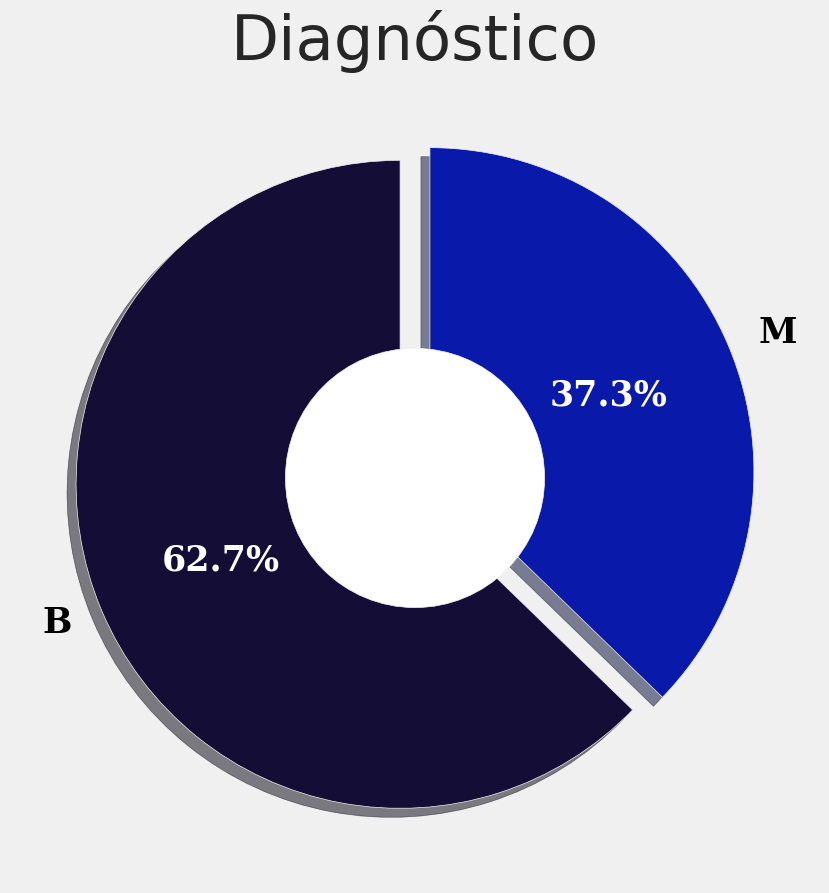

In [56]:
grafico_pizza(df,'diagnosis', ('#140E36', '#091AAB'), (0.05, 0.05), 'Diagnóstico', 25)

Como os dados da coluna diagnosis são do dtype object, precisamos convertê-los em dtype int32 para que seja possível usá-los em nossa análise. Além disso, convetê-los para int32 será importante quando formos criar a nossa Inteligência Artificial (ela somente lê números, não letras). Para converter os valores, use a função LabelEncoder() do módulo sklearn.

In [57]:
# Criar uma lista para armazenar as colunas que possuem o dtype igual a object
colunas = [coluna for coluna in df.columns if df[coluna].dtype == 'object']

# Criar o codificador
codificador = preprocessing.LabelEncoder()

# Codificar cada coluna do conjunto de dados
for coluna in colunas:
    df[coluna] = codificador.fit_transform(df[coluna])

vamos chamar os 5 últimos itens da coluna diagnosis.

In [58]:
df['diagnosis'].tail()

564    1
565    1
566    1
567    1
568    0
Name: diagnosis, dtype: int64

Nesse caso, a classificação de tumor maligno (M) ficou como 1 e de tumor benigno (B), como 0.

Como o conjunto de dados possui 30 colunas com dados, realizar a análise de cada uma demoraria muito tempo e a análise poderia levar a nenhuma conclusão. Para contornar essa situação, vamos analisar somente as colunas que possuem um valor de correlação maior que 0.70.

In [59]:
for coluna in df.columns:
    # Isso evita de correlacionar a coluna "diagnosis" com "diagnosis", já que sempre será 1
    if coluna != 'diagnosis':
        # Correlacionar a coluna "diagnosis" com todas as outras colunas do conjunto
        if df['diagnosis'].corr(df[coluna]) >= 0.7:
            print(f'{coluna}: {df["diagnosis"].corr(df[coluna]):.2f}')

concave points_worst: 0.79
area_worst: 0.73
perimeter_worst: 0.78
radius_worst: 0.78
concave points_mean: 0.78
area_mean: 0.71
perimeter_mean: 0.74
radius_mean: 0.73


Assimetria de Piores Pontos Côncavos: 0.493


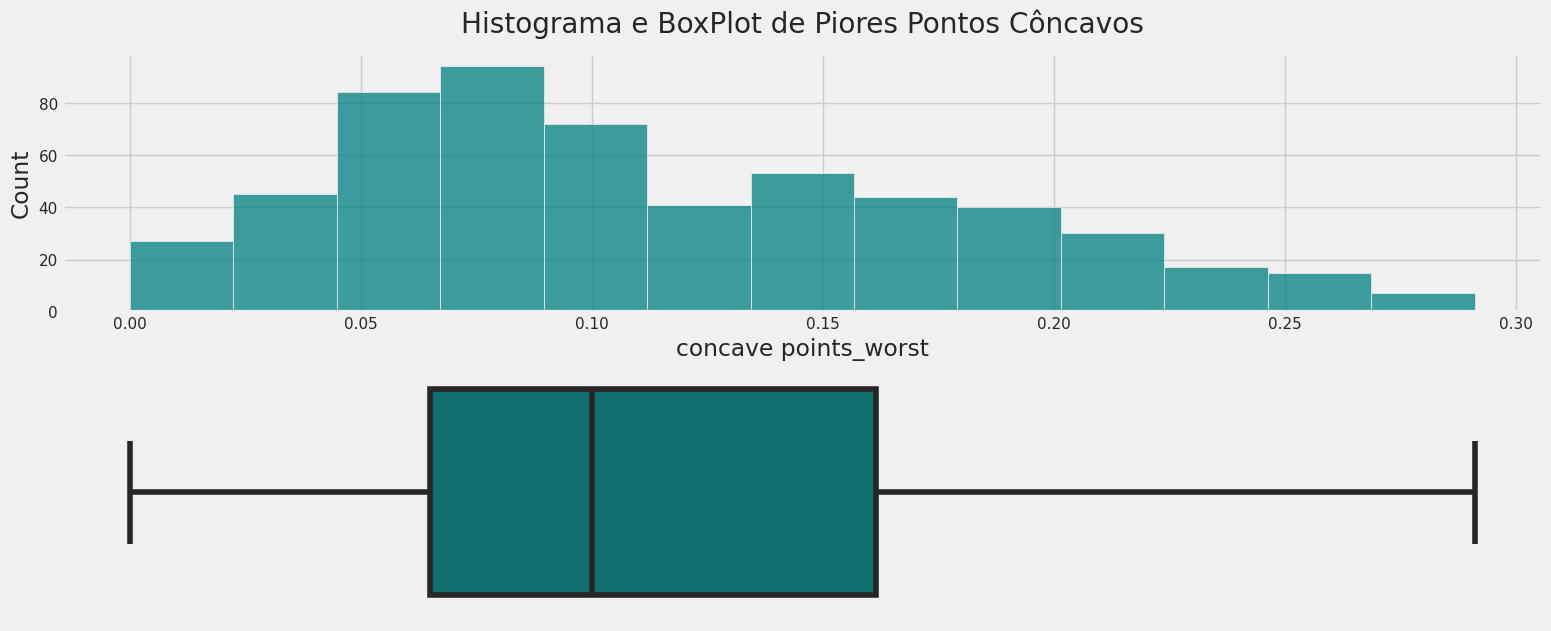

In [60]:
grafico_distribuicao(df, 'concave points_worst', 'Piores Pontos Côncavos')

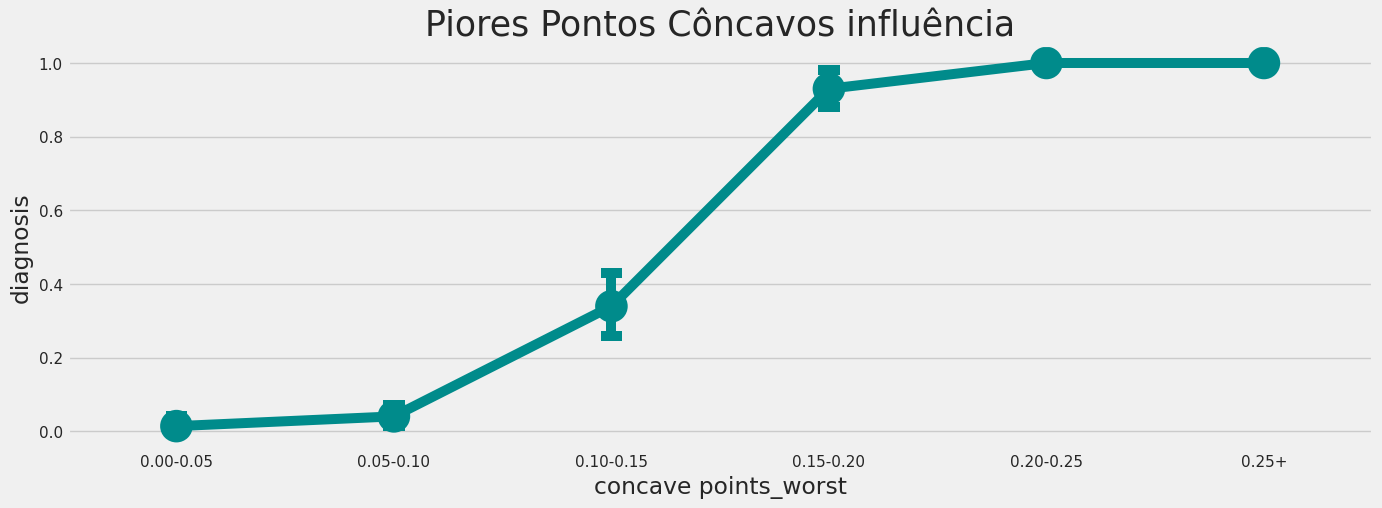

In [61]:
grafico_influencia(df, 'concave points_worst', [0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
                   ['0.00-0.05', '0.05-0.10', '0.10-0.15', '0.15-0.20', '0.20-0.25', '0.25+'], 'Piores Pontos Côncavos')

Caso o tumor mamário analisado possua o valor de piores pontos côncavos maiores que 0.15, as chances são maiores para que seja um tumor malígno.

Assimetria de Pior Área: 1.859


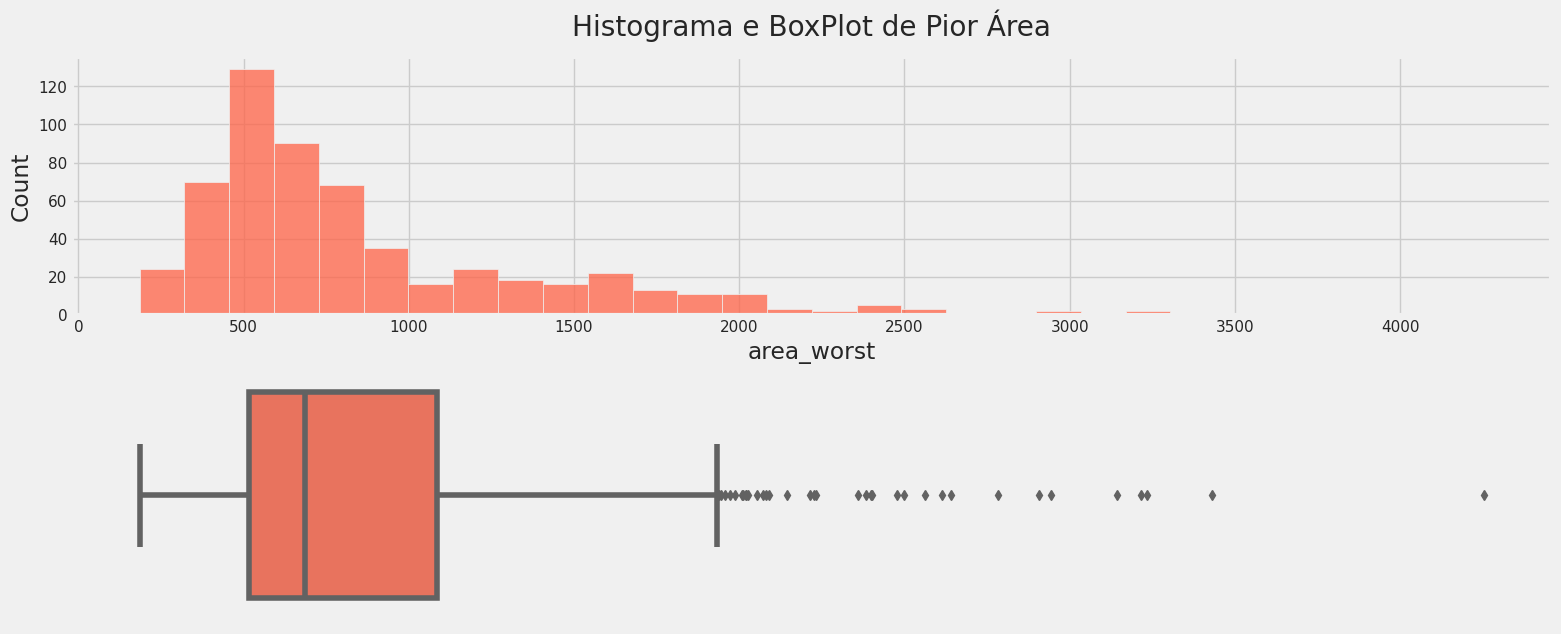

In [62]:
grafico_distribuicao(df, 'area_worst', 'Pior Área')

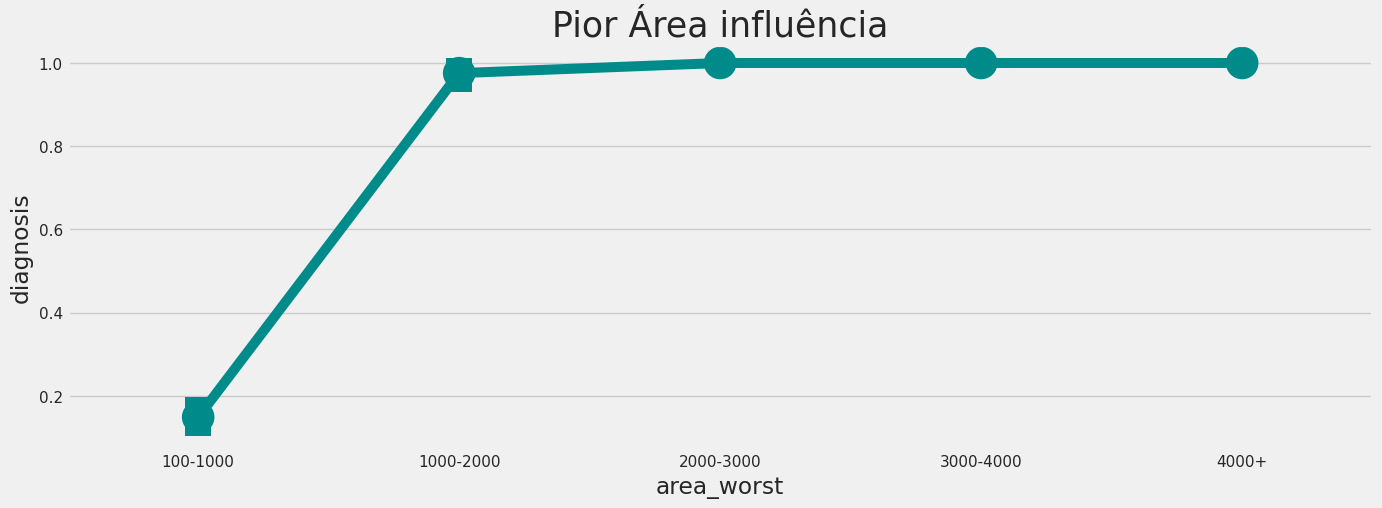

In [63]:
grafico_influencia(df, 'area_worst', [100, 1000, 2000, 3000, 4000, 5000],
                   ['100-1000', '1000-2000', '2000-3000', '3000-4000', '4000+'], 'Pior Área')

Se o valor de área pior do tumor for maior que 1000, é muito provável que a paciente tenha uma neoplasia maligna.

Assimetria de Pior Perímetro: 1.128


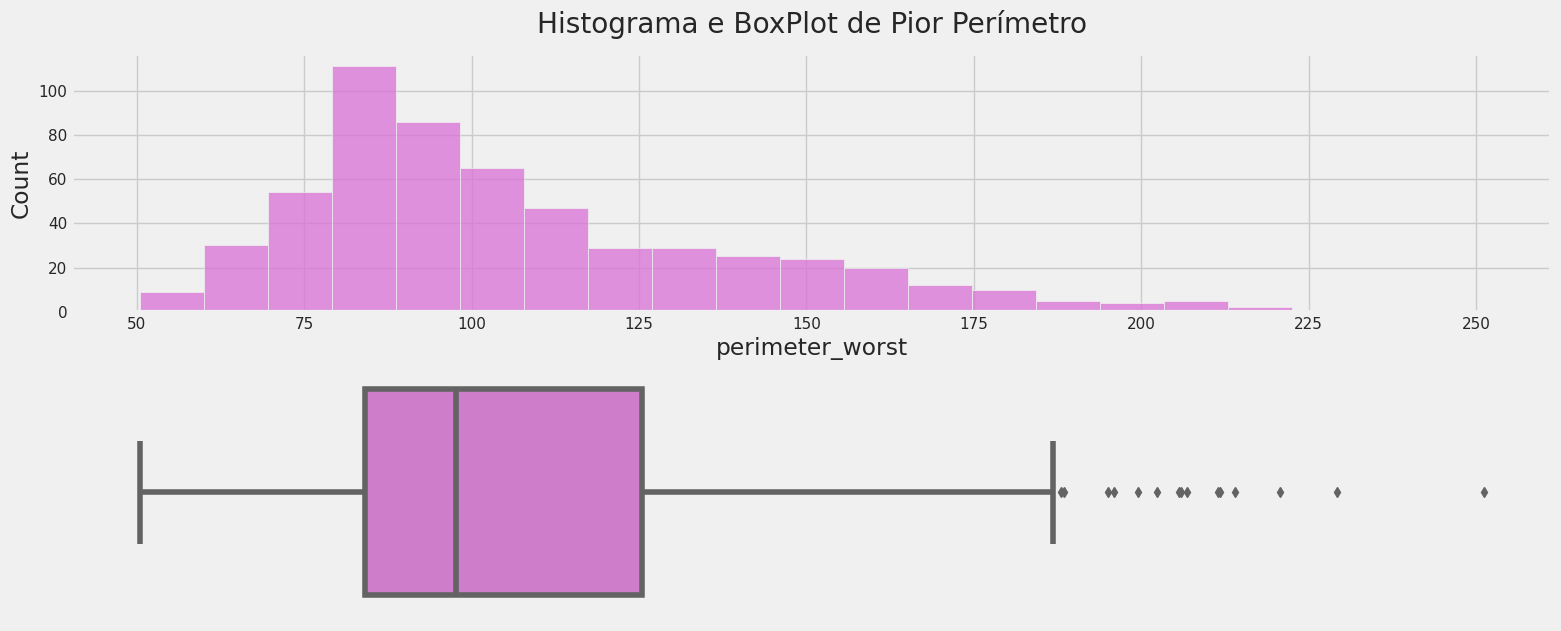

In [64]:
grafico_distribuicao(df, 'perimeter_worst', 'Pior Perímetro')

Pode-se afirmar que as neoplasias que possuem o valor de perímetro pior maior que 150 são tumores malignos.

Assimetria de Pior Raio: 1.103


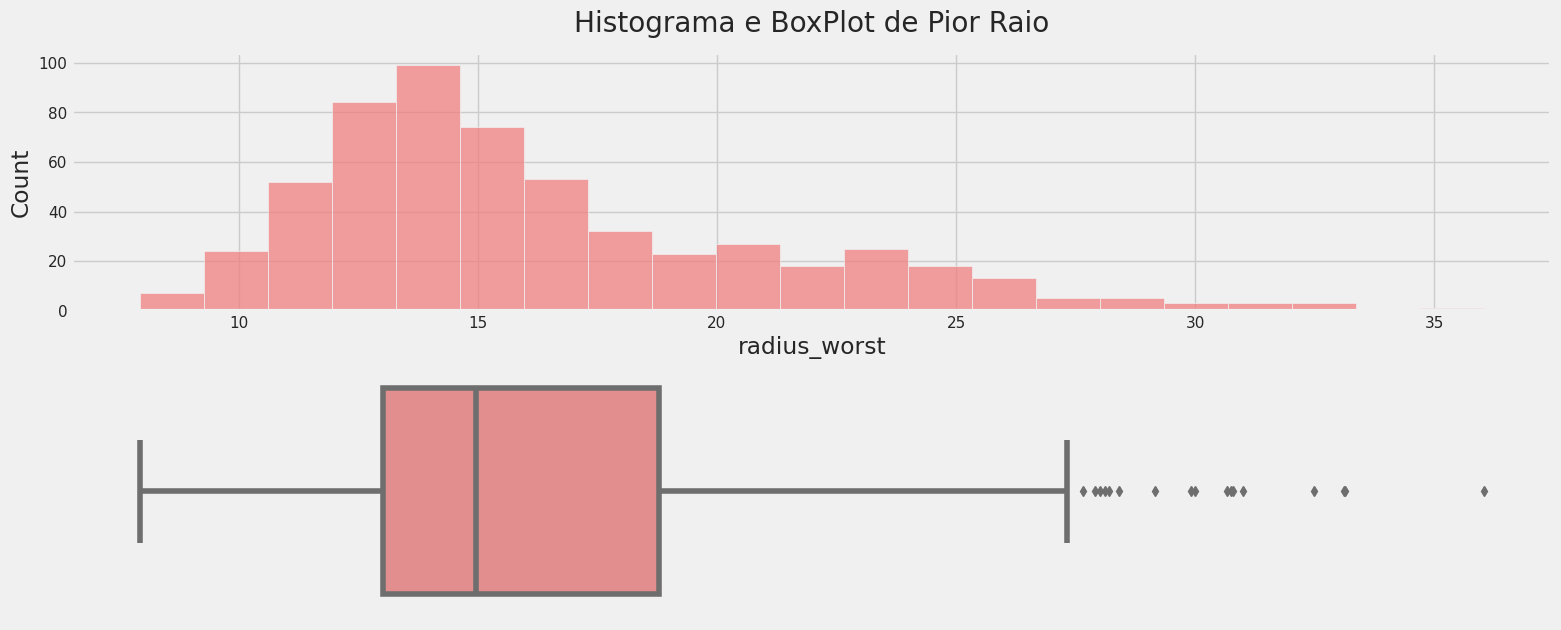

In [65]:
grafico_distribuicao(df, 'radius_worst', 'Pior Raio')

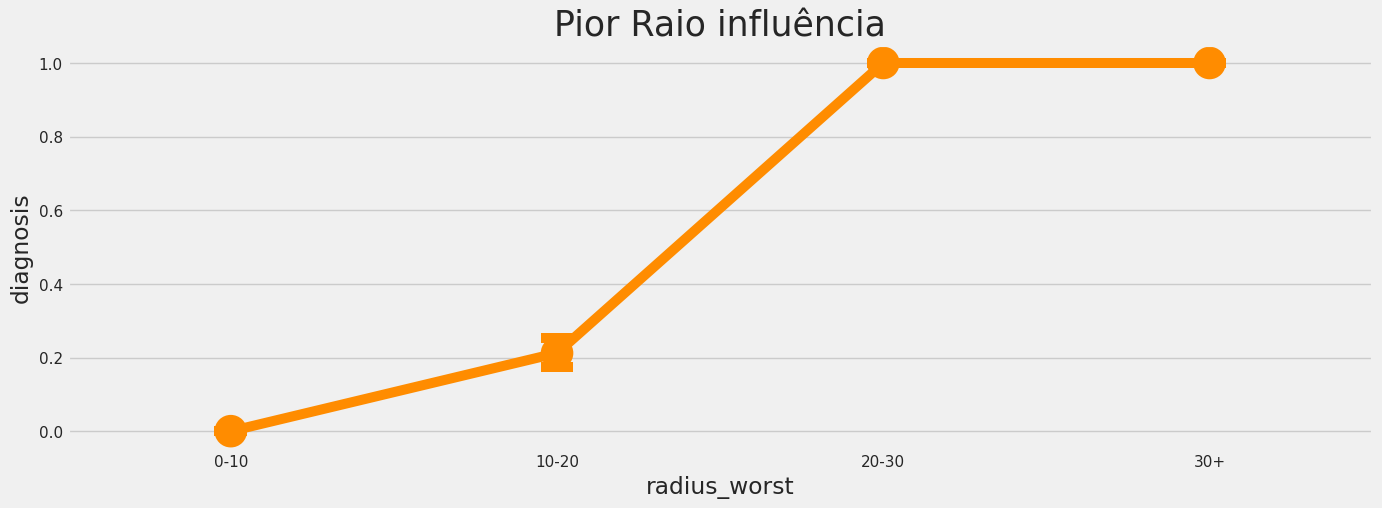

In [66]:
grafico_influencia(df, 'radius_worst', [0, 10, 20, 30, 40], ['0-10', '10-20', '20-30', '30+'], 'Pior Raio')

Tumores que apresentam um raio pior maior do que 20 possuem muito mais chances de serem malignos.

Assimetria de Pontos Côncavos Médio: 1.171


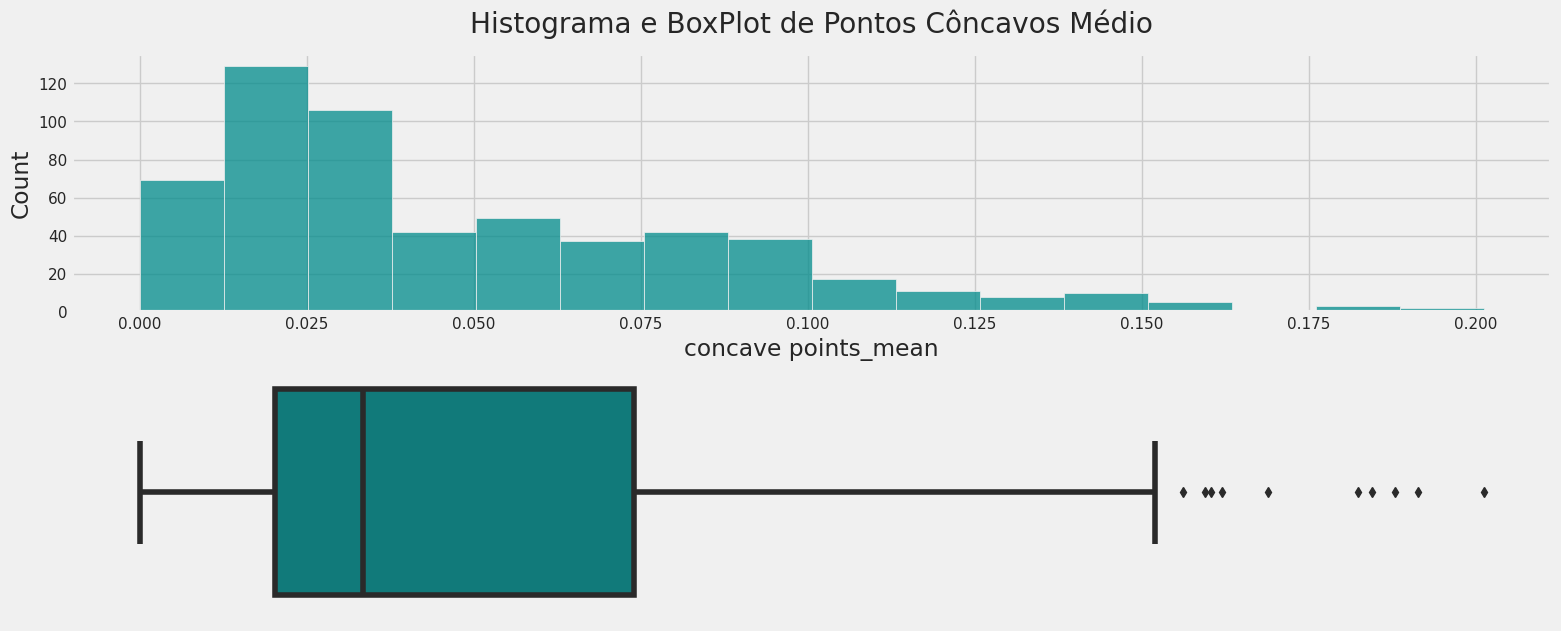

In [67]:
grafico_distribuicao(df, 'concave points_mean', 'Pontos Côncavos Médio')

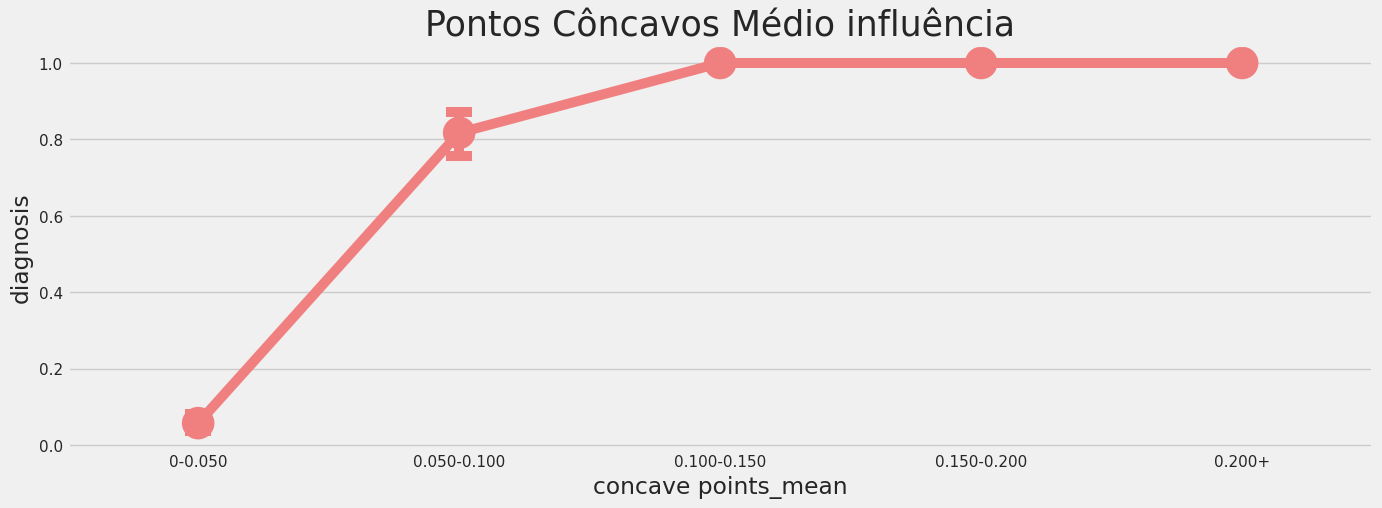

In [68]:
grafico_influencia(df, 'concave points_mean', [0, 0.050, 0.100, 0.150, 0.200, 0.250],
                   ['0-0.050', '0.050-0.100', '0.100-0.150', '0.150-0.200', '0.200+'], 'Pontos Côncavos Médio')

Tumores com o valor de ponto côncavo médio maior que 0,050 têm mais chances de serem malignos.

Assimetria de Área Média: 1.646


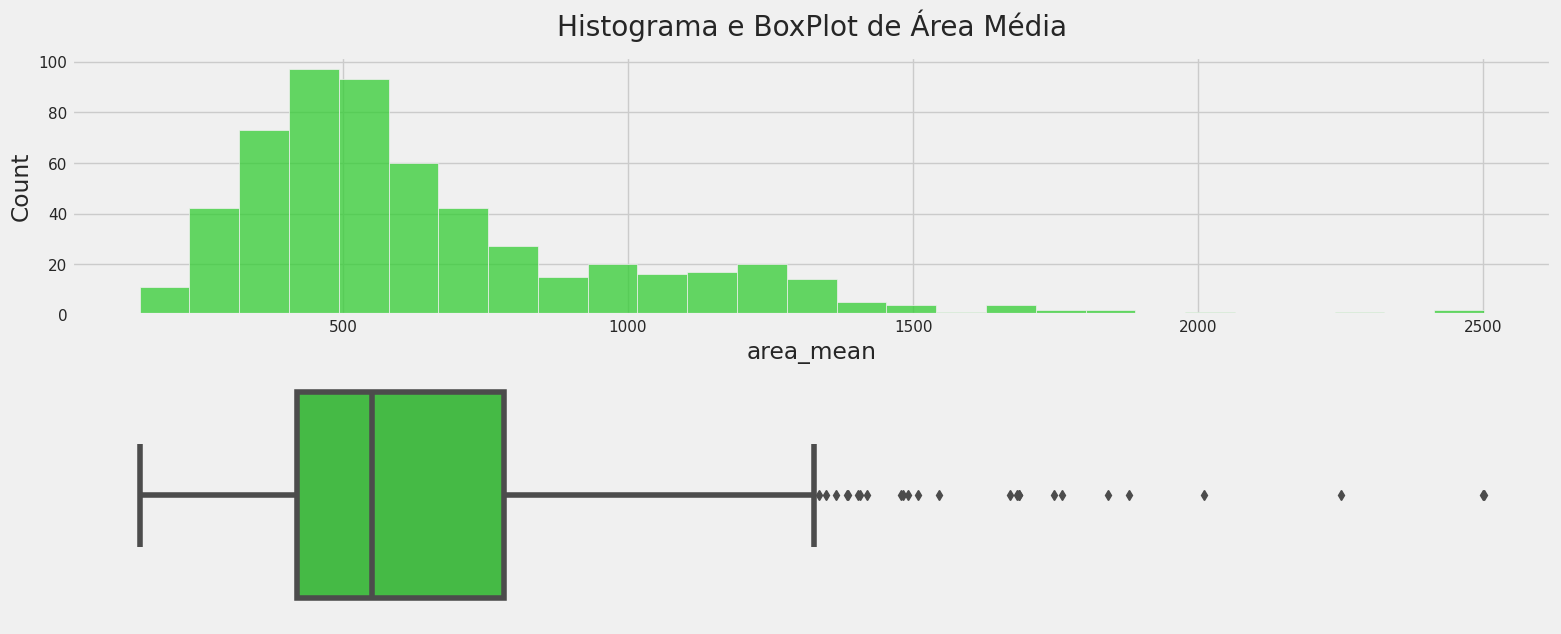

In [44]:
grafico_distribuicao(df, 'area_mean', 'Área Média')

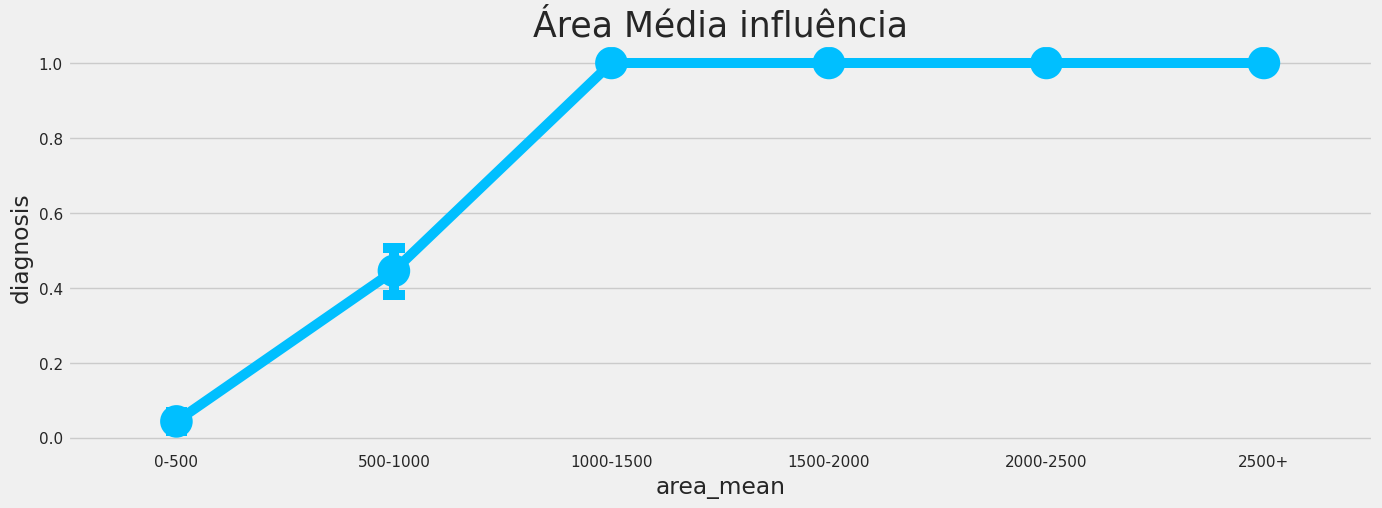

In [ ]:
grafico_influencia(df, 'area_mean', [0, 500, 1000, 1500, 2000, 2500, 3000],
                  ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500+'], 'Área Média')

Tumores mamários com uma área média maior que 1000 possuem grandes chances de serem malignos.

Assimetria de Perímetro Médio: 0.991


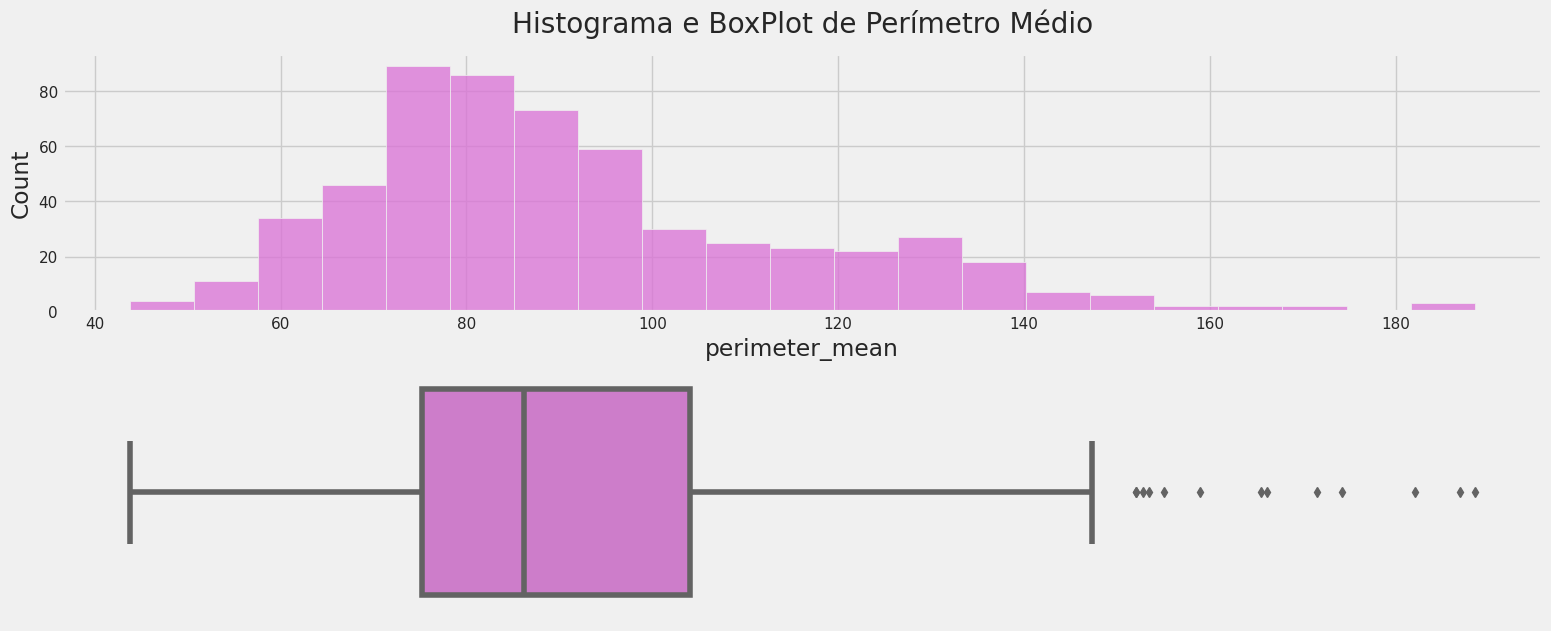

In [69]:
grafico_distribuicao(df, 'perimeter_mean', 'Perímetro Médio')

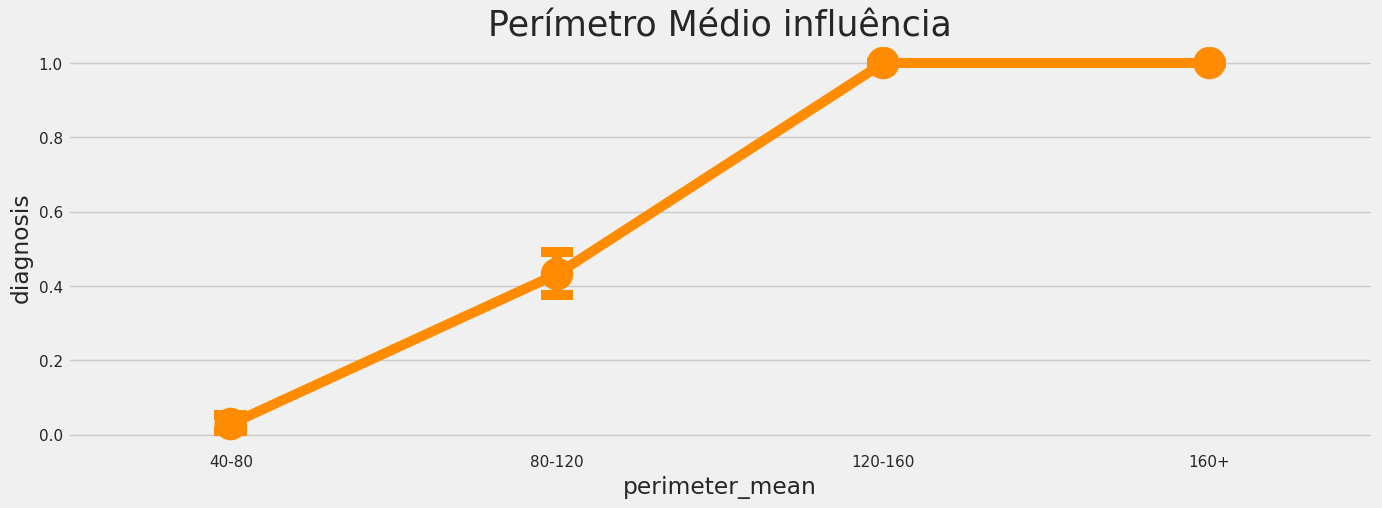

In [70]:
grafico_influencia(df, 'perimeter_mean', [40, 80, 120, 160, 200],
                   ['40-80', '80-120', '120-160', '160+'], 'Perímetro Médio')

Neoplasias que possuem o valor de perímetro médio maior que 120 têm mais chances de serem malignas.

Assimetria de Raio Médio: 0.942


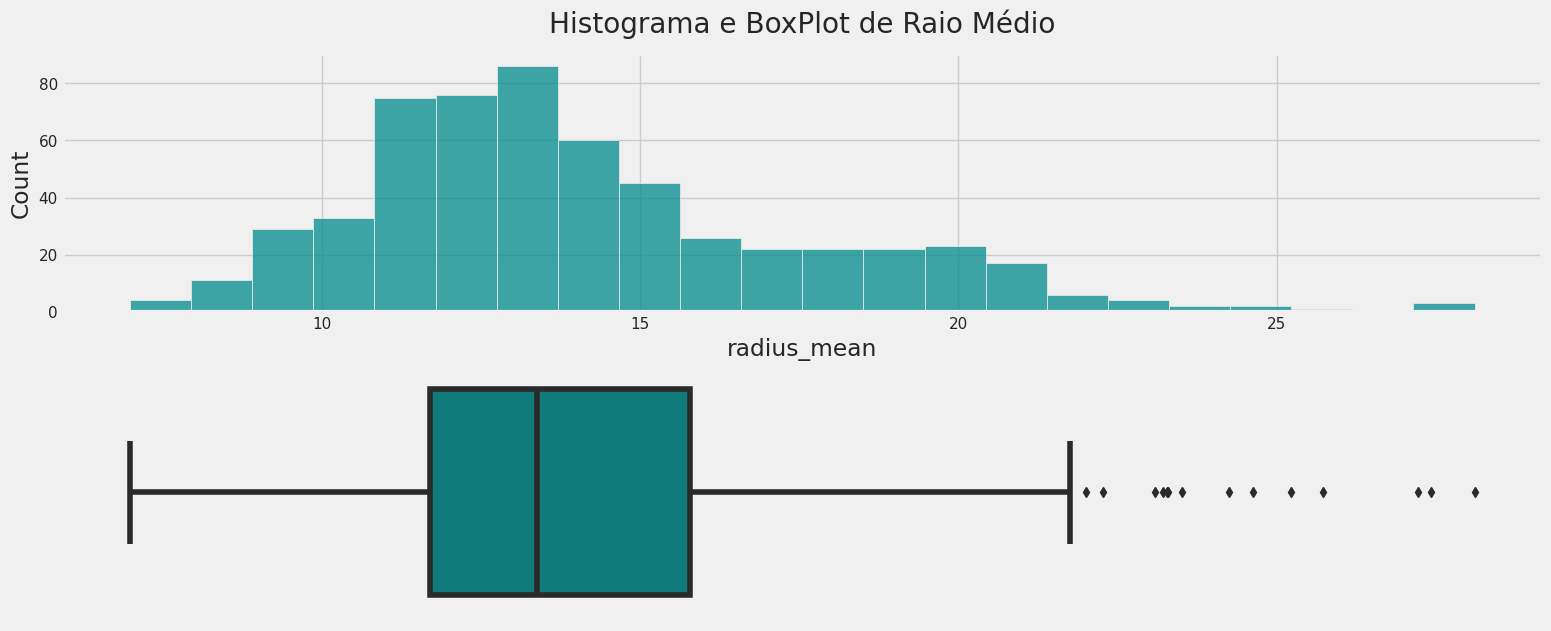

In [71]:
grafico_distribuicao(df, 'radius_mean', 'Raio Médio')

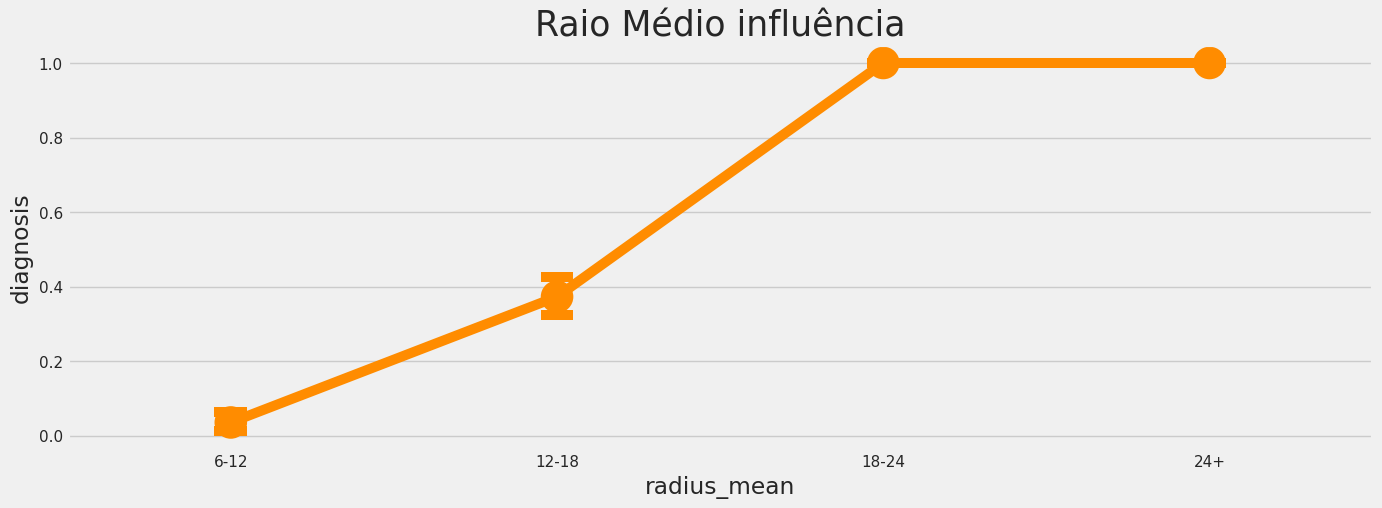

In [ ]:
grafico_influencia(df, 'radius_mean', [6, 12, 18, 24, 30],
                  ['6-12', '12-18', '18-24', '24+'], 'Raio Médio')

O valor de raio médio maior do que 18 pode indicar que se trata de um tumor maligno.

**3.3. Visualizações Multimodais**

Esse mapa de calor não possui as anotações do valor da correlação dentro de cada quadrado porque ficaria uma poluição visual imensa.

Essa análise com o mapa de calor (heat map) deixa bem mais fácil a visualização e entendimento de como os dados se correlacionam.

Uma forma bem simples de entender o que os números querem dizer é que quanto mais perto de 1; maior é a correlação entre os dados, isto é: se um dado aumenta, o outro também aumenta, e se um dado diminui o outro também diminui.


Quanto mais próximo de -1; menor é a correlação entre os dados, isto é: se um dado aumenta, o outro diminui, e se um dado diminui o outro também diminui.


Essa análise serve também como uma ferramenta para ver se os dados fazem sentido e se estamos indo pelo caminho certo

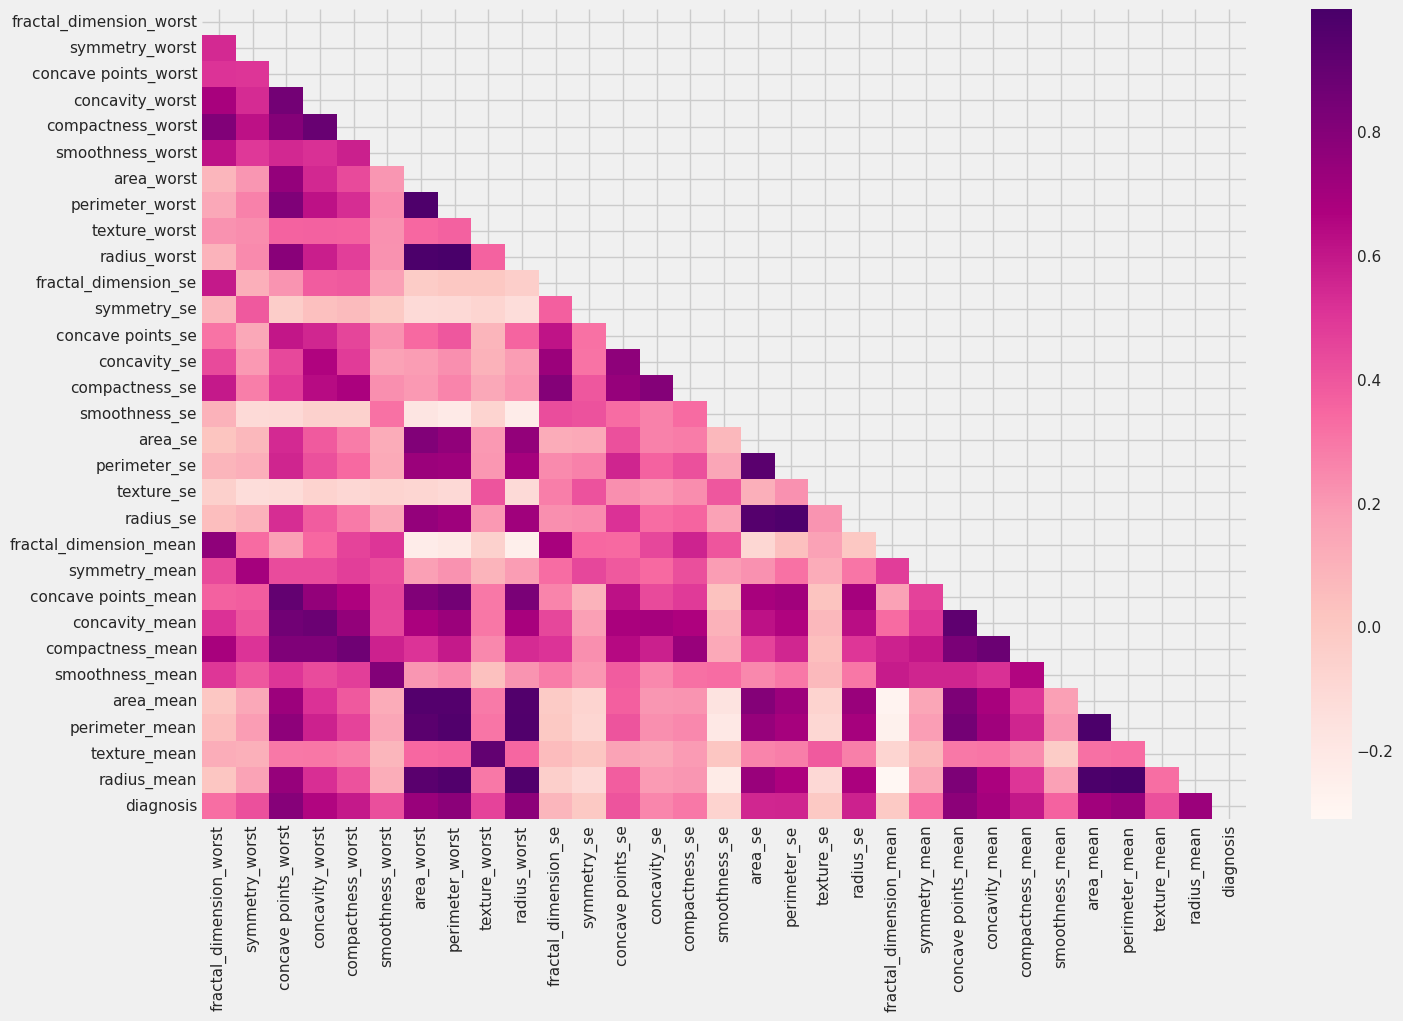

In [72]:
# Dimensões da plotagem
plt.figure(figsize=(15, 10))

# Criar a máscara para mostrar somente a metade das correlações
mascara = np.triu(df.corr())

# Criar o heatmap (mapa de calor)
sns.heatmap(data=df.corr(), cmap='RdPu', mask=mascara)

# Mostrar a plotagem
plt.show()

# **4. Pré-Processamento de dados**

Nesta etapa precisamos separar os dados em dois grupos: o primeiro sendo os dados com todas as informações dos pacientes e o segundo, somente a coluna com o resultado; que no caso é a coluna diagnosis, uma vez que é ela o resultado final que queremos (não adianta entregar a resposta junto com a pergunta né?).


Para isso, separaremos em duas variáveis: o primeiro grupo sendo o X e o segundo sendo o y. Usaremos essas notações já que é algo padrão usado no Aprendizado de Máquina.

In [73]:
# Separar os dados em dois grupos
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

Agora vamos separar os dados em dados de treino e dados de teste.

Separá-los serve para que a Inteligência Artificial (IA) não tenha um overfit.

Esse termo é usado quando uma IA se sai muito bem com os dados de treino, mas quando analisa os dados de teste, ou seja, dados que ela nunca viu, ela se sai bem péssima.

É a mesma coisa quando você faz uma prova, você estuda antes com os exercícios para que se saia bem na avaliação, já que essa avaliação possui questões semelhantes as que você estudou, mas não iguais.

Se forem as mesmas questões do estudo e da prova, qual a certeza de que você realmente aprendeu a matéria? Isso vale para a IA! Então separamos uma quantidade aleatória de dados para que a IA treine e se saia bem com os dados de teste, esses que ela nunca viu.

Para que isso seja feito, vamos usar a função train_test_split() do módulo sklearn.

In [74]:
# Informar os arrays para a separação, nesse caso X & y
# Informar o tamanho do conjunto de treino, nesse caso é de 70% dos dados serão para o treino da IA
# Informar o parâmetro "random_state" como 0 para que seja sempre os mesmos dados a serem usados quando for
# reproduzir novamente o treinamento da IA
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size=0.7, random_state=0)

# 4.1. Tratamento de Missings e Limpeza

In [75]:
# verificando nulls no dataset
df.isnull().sum()

fractal_dimension_worst    0
symmetry_worst             0
concave points_worst       0
concavity_worst            0
compactness_worst          0
smoothness_worst           0
area_worst                 0
perimeter_worst            0
texture_worst              0
radius_worst               0
fractal_dimension_se       0
symmetry_se                0
concave points_se          0
concavity_se               0
compactness_se             0
smoothness_se              0
area_se                    0
perimeter_se               0
texture_se                 0
radius_se                  0
fractal_dimension_mean     0
symmetry_mean              0
concave points_mean        0
concavity_mean             0
compactness_mean           0
smoothness_mean            0
area_mean                  0
perimeter_mean             0
texture_mean               0
radius_mean                0
diagnosis                  0
dtype: int64

# Separados em treino e teste


Usarei os três algoritmos de Aprendizado de Máquina e ver qual deles é o melhor.


**São eles, em ordem alfabética:**


1.   Gradient Boosting Classifier;
2.   kNN (K-Nearest Neighbours)
3.   Random Forest Classifier.



Todos esses algoritmos estão presentes no módulo sklearn.

In [76]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=70,
                                max_features=2, n_estimators=500, random_state=0)

# kNN
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', weights='uniform', n_jobs=-1)

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=500, max_depth=70, max_features=2, random_state=0, n_jobs=-1)

Treiná-los com o método fit().

Os parêmetros usados são o X_treino e y_treino.

As células a seguir podem demorar para ficarem prontas e exigem uma certa capacidade do processador.

In [77]:
# Treinar o Gradient Boosting Classifier
gbc.fit(X_treino, y_treino)

GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=70,
                           max_features=2, n_estimators=500, random_state=0)

In [78]:
# Treinar o kNN
knn.fit(X_treino, y_treino)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [79]:
# Treinar o Random Forest Classifier
rfc.fit(X_treino, y_treino)

RandomForestClassifier(max_depth=70, max_features=2, n_estimators=500,
                       n_jobs=-1, random_state=0)

Com os modelos treinados, vejamos como eles se saem com os dados de teste

Lembre-se que esses dados as IAs nunca viram. Vamos analisar a matriz de confusão de cada modelo. Essa matriz serve para observar a taxa de acertos e erros da IA. Para ver essa matriz, chame a função confusion_matrix do módulo sklearn.

Além de analisar a matriz de confusão de cada classificador, veremos sua acurácia, precisão, revocação e pontuação F1. Mas que raios é tudo isso aí? Vejamos cada um e qual a sua finalidade.

Acurácia: A pergunta que a acurácia responde é: no geral, o quão frequente o classificador está correto? A acurácia é definida por:
acuracia.

Precisão: A pergunta que a precisão responde é: daqueles que foram classificados como corretos, quantos efetivamente são corretos? A precisão é definida por:
precisao

Revocação: A pergunta que a revocação responde é: quando realmente é da classe X, o quão frequente é classificado como X?. A revocação é definida por:
revocacao

Pontuação F1: Essa métrica combina a precisão e a revocação para que haja um número único que indique a qualidade geral do modelo. A pontuação F1 é definida por:pontuacao_f1.

In [80]:
# Para avaliar as métricas e a matriz de confusão, vamos criar uma função para facilitar a nossa vida
def metricas(X_teste, y_teste, classificador, nome_clf):
    # Prever o resultado
    y_pred = classificador.predict(X_teste)

    # Métrica de acurácia
    acuracia = accuracy_score(y_teste, y_pred)

    # Métrica de precisão
    precisao = precision_score(y_teste, y_pred)

    # Métrica de revocação
    revocacao = recall_score(y_teste, y_pred)

    # Métrica de pontuação F1
    f1 = f1_score(y_teste, y_pred)

    # Mostrar os valores das métricas
    print(f'''{nome_clf}

Acurácia: {acuracia:.3f}

Precisão: {precisao:.3f}

Revocação: {revocacao:.3f}

Pontuação F1: {f1:.3f}''')

    # Criar a matriz de confusão
    matriz = confusion_matrix(y_teste, y_pred)

    # Criar um DataFrame para aramazenar os dados de "y_pred" e "y_teste"
    df_mc = pd.DataFrame(matriz, index=['B', 'M'], columns=['B', 'M'])

    # Determinar o tamanho da plotagem
    plt.figure(figsize=(15, 10))

    # Criar a plotagem
    mapa_calor = sns.heatmap(data=df_mc,
                            annot=True,
                            cmap='RdPu',
                            fmt='.5g',
                            annot_kws={'size': 20})

    # Colocar o título da matriz de confusão
    mapa_calor.set_title(f'Matriz de Confusão {nome_clf}', fontsize=25, y=1.05)

    # Adicionar a legenda nos eixos
    plt.xlabel('Valores Previstos', fontsize=20)
    plt.ylabel('Valores Reais', fontsize=20)

    # Mostrar a matriz de confusão
    plt.show()

Com a função devidamente criada, basta chamá-la para cada classificador.

Gradient Boosting Classifier

Acurácia: 0.965

Precisão: 0.952

Revocação: 0.952

Pontuação F1: 0.952


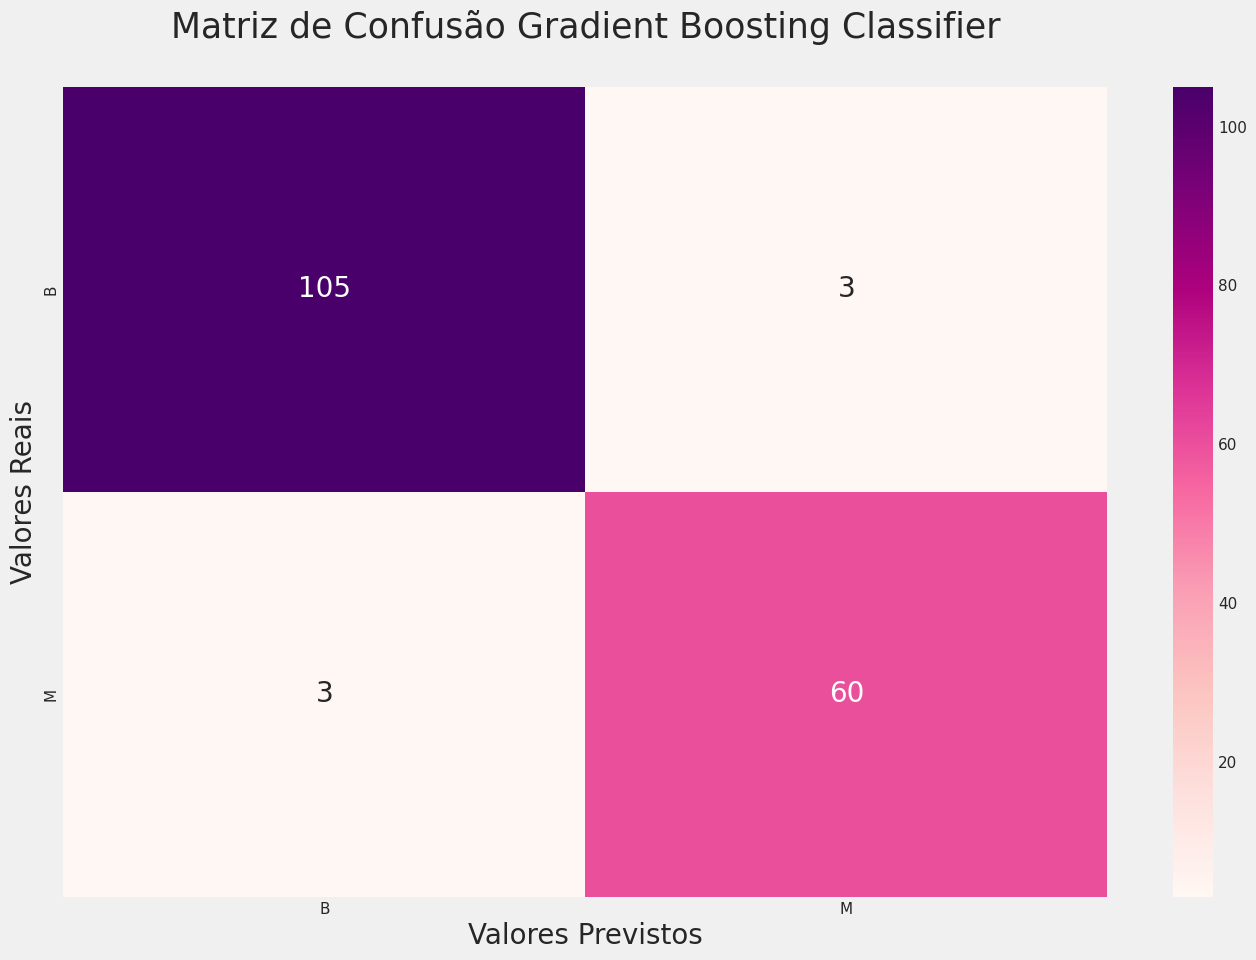

In [81]:
# Mostrar as métricas e a matriz de confusão de Gradient Boosting Classifier
metricas(X_teste, y_teste, gbc, 'Gradient Boosting Classifier')

kNN

Acurácia: 0.947

Precisão: 0.922

Revocação: 0.937

Pontuação F1: 0.929


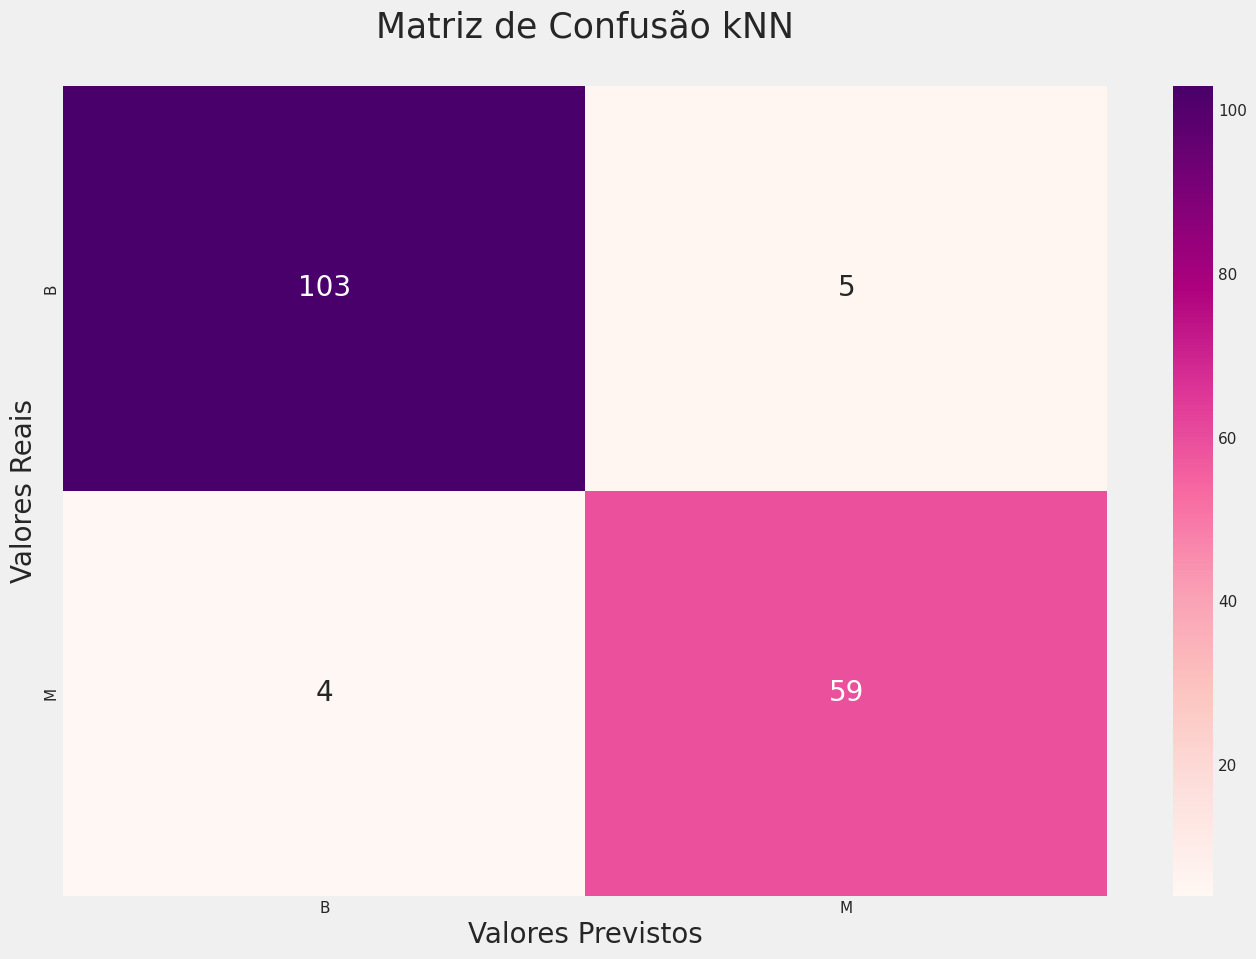

In [82]:
# Mostrar as métricas e a matriz de confusão de kNN
metricas(X_teste, y_teste, knn, 'kNN')

Random Forest Classifier

Acurácia: 0.959

Precisão: 0.938

Revocação: 0.952

Pontuação F1: 0.945


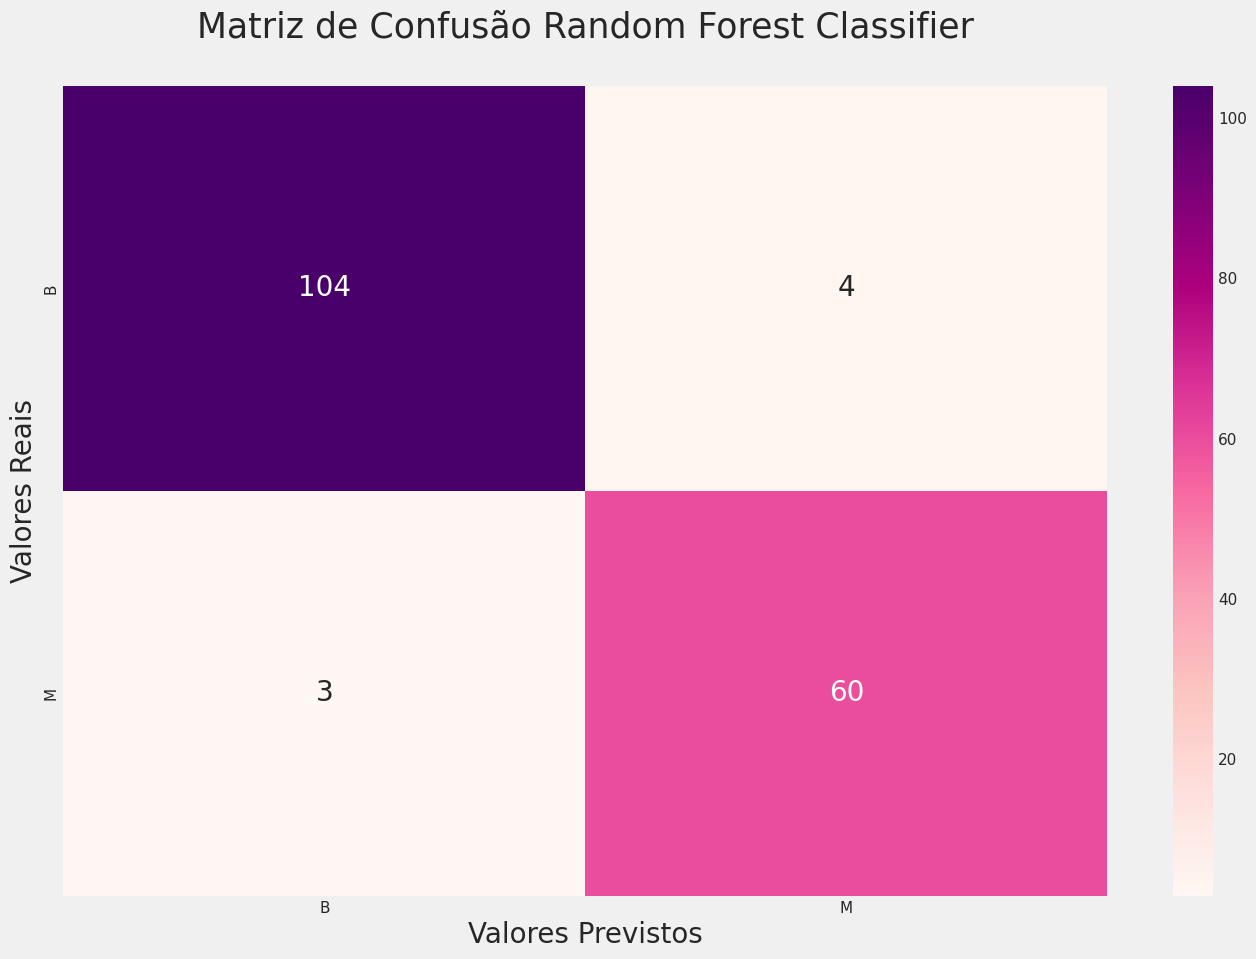

In [83]:
# Mostrar as métricas e a matriz de confusão de Random Forest Classifier
metricas(X_teste, y_teste, rfc, 'Random Forest Classifier')

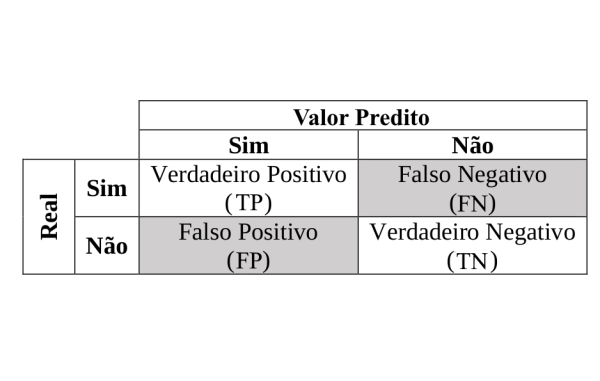



*  Para Simplificar:


1.  Verdadeiro positivo (TP): Quando a IA previu benigno e o valor real também é benigno.

2. Falso positivo (FT): Quando a IA previu benigno e o valor real é maligno.


3. Falso negativo (FN): Quando a IA previu maligno e o valor real é benigno.


4. Verdadeiro negativo (TN): Quando a IA previu maligno e o valor real também é maligno.

# Conclusões finais


Dentre os três modelos de Aprendizado de Máquina, o melhor foi o Random Forest Classifier. Vamos analisar as pontuações de suas métricas:

**Acurácia**: Em 95,9% dos casos o modelo acerta.

**Precisão**: Em 93,8% dos casos o modelo tem certeza do resultado que entrega.

**Revocação:** Em 95,2% dos casos o modelo prevê a classe e realmente é a classe prevista.

**Pontuação F1:**  A precisão e revocação do modelo estão de acordo em 94,5% dos casos.


Uma precisão de 93,8% já é um ótimo começo para ajudar aos pacientes e a equipe médica a determinar se o câncer de mama é benigno ou maligno, uma vez que determinado a classe da neoplasia fica mais fácil e rápido escolher um tratamento eficaz contra essa enfermidade; aumentando assim as chances de cura nos pacientes.